In [8]:
# For MO-ASMO optimizaiton, what will happen if we normalize the target metrics (two error metrics) or not?
# the parameter inputs have been normalized anyway (min-max normalization)

# conclusion: normalize y does not lead to better outputs based on real model simulations. probably a bit worse

In [3]:
import sys, os, glob, pickle, toml, json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

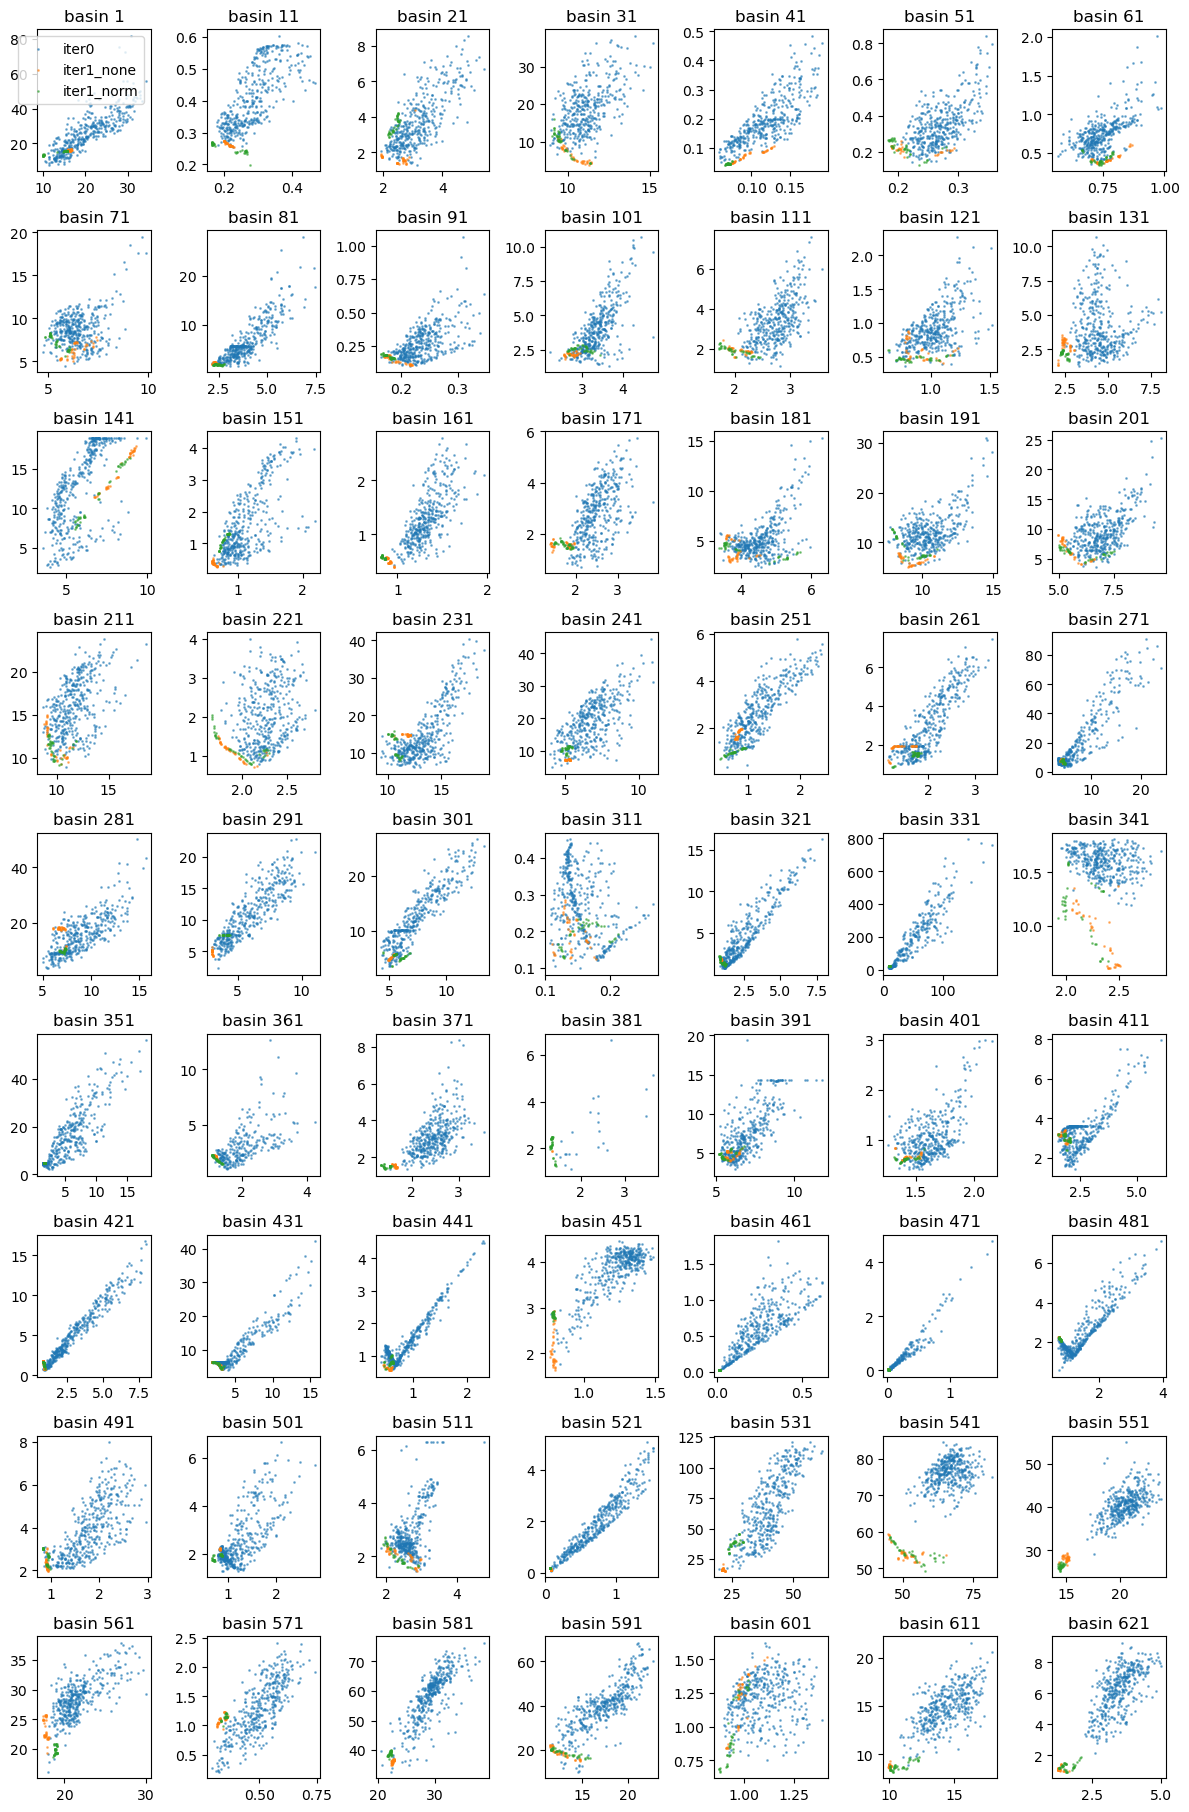

In [5]:
fig = plt.figure(figsize=[12, 20])

flag = 1
for tarbasin in range(1, 627, 10):
    
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_norm2err/iter1_many_metric.csv'
    
    df_iter0 = pd.read_csv(infile1)
    df_iter1_ob = pd.read_csv(infile2)
    df_iter1_ab = pd.read_csv(infile3)
    
    # compare two error metrics
    labels = ['iter0', 'iter1_none', 'iter1_norm']
    data = [df_iter0, df_iter1_ob, df_iter1_ab]

    fig.add_subplot(10, 7, flag)
    for i in range(3):
        plt.scatter(data[i]['mae'], data[i]['max_mon_abs_err'], 1, alpha=0.5, label=labels[i])
    plt.title(f'basin {tarbasin}')

    if flag == 1:
        plt.legend()

    flag = flag + 1
        
plt.tight_layout()
plt.show()

In [7]:
# compare all metrics

bestkge = []
bestmae = []
bestmaxme = []

for tarbasin in range(1, 627, 10):
    inpath_moasmo = '/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/'
    infile1 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter0_many_metric.csv'
    infile2 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs/iter1_many_metric.csv'
    infile3 = f'{inpath_moasmo}/level1_{tarbasin}_MOASMOcalib/ctsm_outputs_norm2err/iter1_many_metric.csv'
    
    df_iter0 = pd.read_csv(infile1)
    df_iter1_ob = pd.read_csv(infile2)
    df_iter1_ab = pd.read_csv(infile3)

    bestkge.append([ df_iter0['kge'].max(), df_iter1_ob['kge'].max(), df_iter1_ab['kge'].max()])
    bestmae.append([ df_iter0['mae'].min(), df_iter1_ob['mae'].min(), df_iter1_ab['mae'].min()])
    bestmaxme.append([ df_iter0['max_mon_abs_err'].min(), df_iter1_ob['max_mon_abs_err'].min(), df_iter1_ab['max_mon_abs_err'].min()])

bestkge = np.array(bestkge)
print(bestkge.shape)

# plt.plot(bestkge)
# plt.legend(['iter0', 'iter1_none', 'iter1_normy'])
# plt.ylim(0, 1)
# plt.show()

bestkge = np.array(bestkge)
print('median bestkge iter0/iter1_none/iter1_normy', np.nanmedian(bestkge,axis=0))
print('mean bestkge iter0/iter1_none/iter1_normy', np.nanmean(bestkge,axis=0))
print('iter1_none better than iter0', np.sum(bestkge[:,1]>bestkge[:,0]) / bestkge.shape[0])
print('iter1_normy better than iter0', np.sum(bestkge[:,2]>bestkge[:,0]) / bestkge.shape[0])


bestmae = np.array(bestmae)
print('median bestmae iter0/iter1_none/iter1_normy', np.nanmedian(bestmae,axis=0))
print('mae: iter1_none better than iter0', np.sum(bestmae[:,1]<bestmae[:,0]) / bestmae.shape[0])
print('mae: iter1_normy better than iter0', np.sum(bestmae[:,2]<bestmae[:,0]) / bestmae.shape[0])

bestmaxme = np.array(bestmaxme)
print('median bestmaxme iter0/iter1_none/iter1_normy', np.nanmedian(bestmaxme,axis=0))
print('max_montherr: iter1_none better than iter0', np.sum(bestmaxme[:,1]<bestmaxme[:,0]) / bestmaxme.shape[0])
print('max_montherr: iter1_normy better than iter0', np.sum(bestmaxme[:,2]<bestmaxme[:,0]) / bestmaxme.shape[0])

(63, 3)
median bestkge iter0/iter1_none/iter1_normy [0.49535038 0.32623319 0.36570747]
mean bestkge iter0/iter1_none/iter1_normy [0.45440748 0.27462357 0.3111791 ]
iter1_none better than iter0 0.23809523809523808
iter1_normy better than iter0 0.20634920634920634
median bestmae iter0/iter1_none/iter1_normy [1.81942626 1.73383508 1.66710386]
mae: iter1_none better than iter0 0.3333333333333333
mae: iter1_normy better than iter0 0.42857142857142855
median bestmaxme iter0/iter1_none/iter1_normy [1.43382381 1.856449   2.06720515]
max_montherr: iter1_none better than iter0 0.2698412698412698
max_montherr: iter1_normy better than iter0 0.23809523809523808


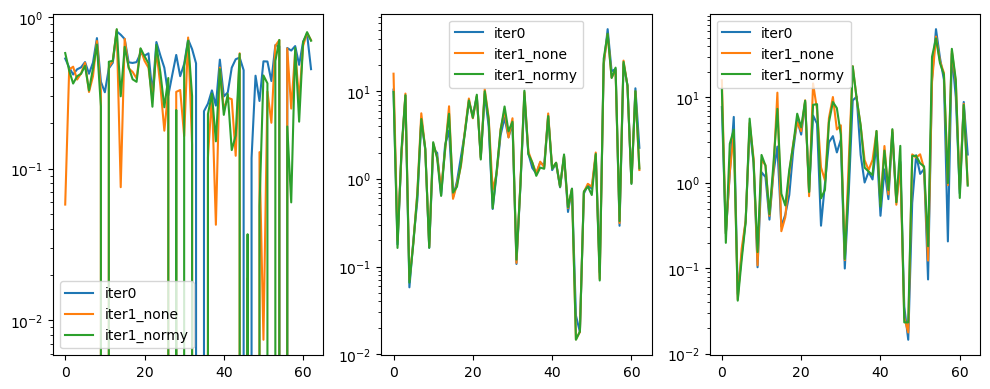

In [9]:
fig = plt.figure(figsize=[10,4])

fig.add_subplot(1,3,1)
plt.plot(bestkge)
plt.legend(['iter0', 'iter1_none', 'iter1_normy'])
plt.yscale('log')

fig.add_subplot(1,3,2)
plt.plot(bestmae)
plt.legend(['iter0', 'iter1_none', 'iter1_normy'])
plt.yscale('log')

fig.add_subplot(1,3,3)
plt.plot(bestmaxme)
plt.legend(['iter0', 'iter1_none', 'iter1_normy'])
plt.yscale('log')

plt.tight_layout()
plt.show()